# DBN - Image Generation
--------------------------------------

In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [2]:
from source.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from source.DNN import DNN

# Alpha Digits

In [3]:
def alpha(up_to, letter=True):
    data = load_alpha_digits()
    digits = []
    for digit_idx in range(up_to+1):
        if digit_idx==1:
            pass
        else:
            if letter:
                digit = [data["dat"][10+digit_idx][i].flatten() for i in range(data["dat"][10+digit_idx].shape[0])]
            else:
                digit = [data["dat"][digit_idx][i].flatten() for i in range(data["dat"][digit_idx].shape[0])]
            digit = np.array(digit)
            digits.append(digit)

    digits = np.concatenate(digits)
    return digits

def gen_and_plot(dnn: DNN, reshape):
    fig, axs = plt.subplots(1, 5)
    fig.set_size_inches(17, 3)
    gen = dnn.generate_image_DBN(5, 100, reshape)
    for i in range(5):
        axs[i].imshow(gen[i], cmap='gray')
    plt.show()

## Letters Only

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

0


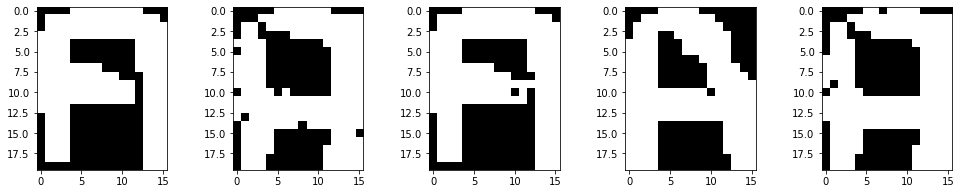

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

1


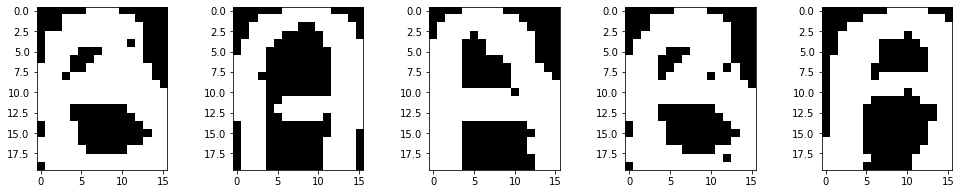

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

2


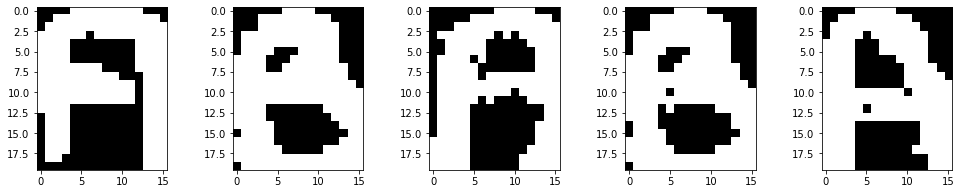

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

3


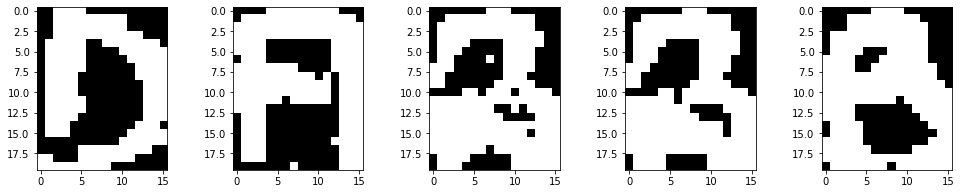

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

4


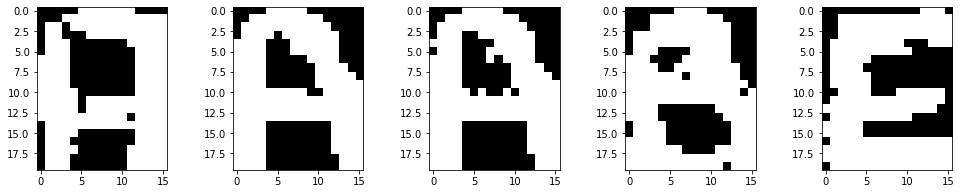

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

5


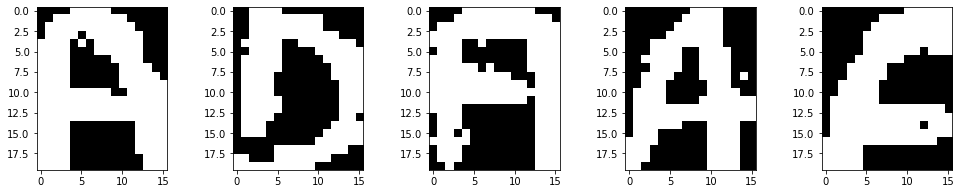

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

6


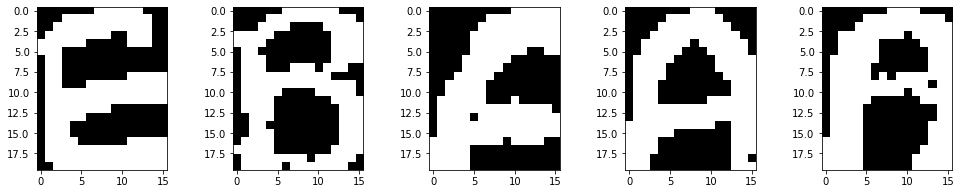

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

7


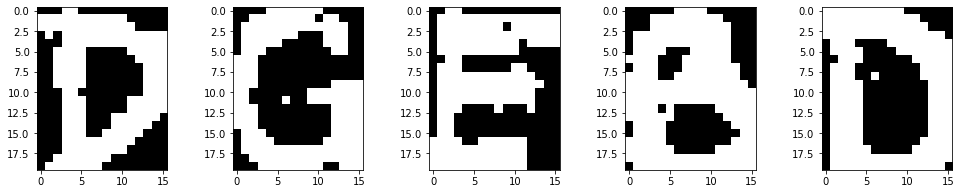

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

8


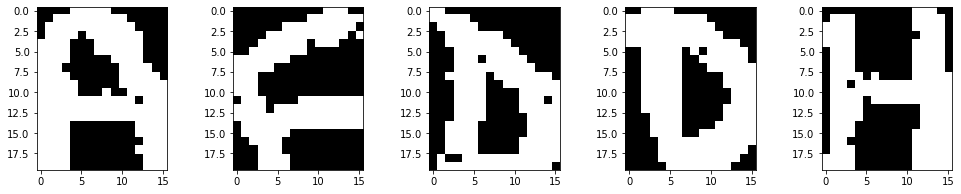

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

9


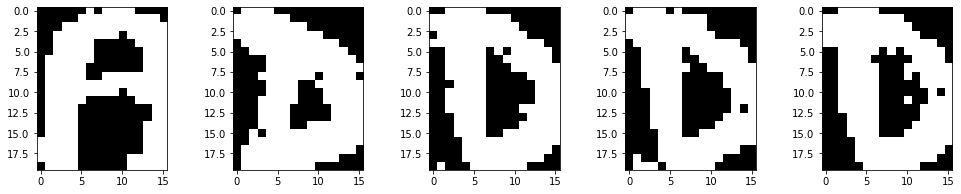

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

10


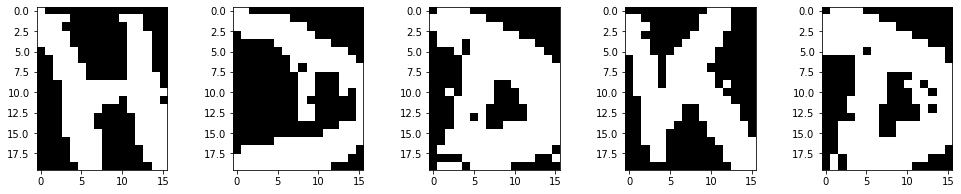

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

11


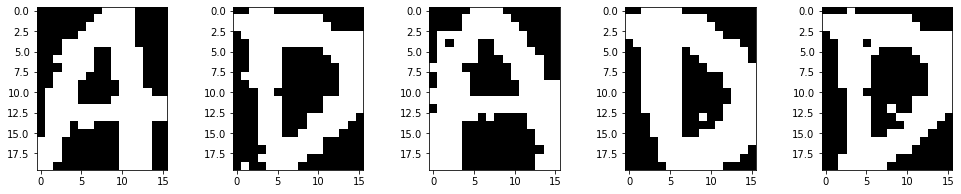

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

12


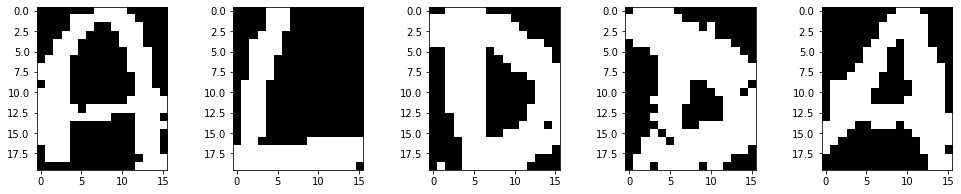

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

13


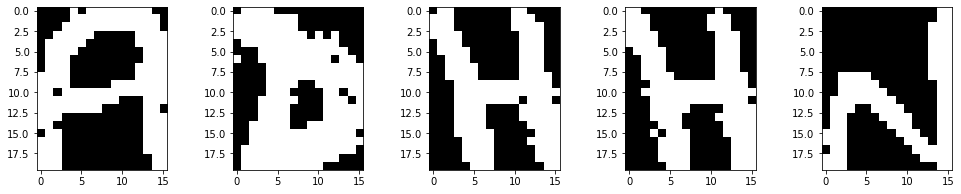

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

14


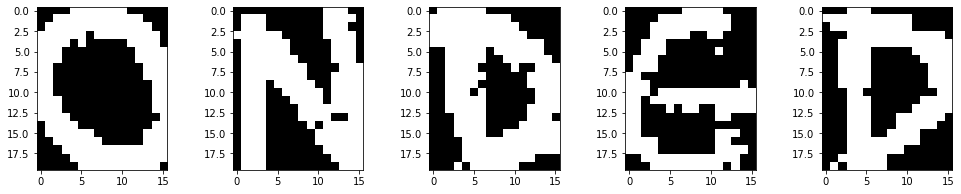

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

15


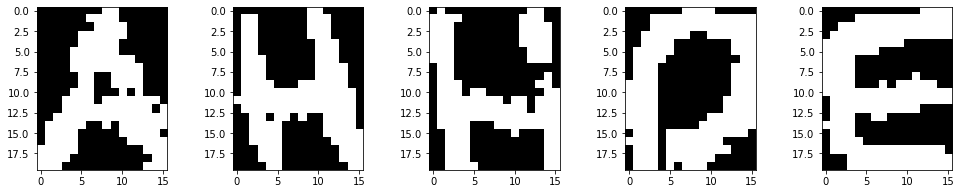

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

16


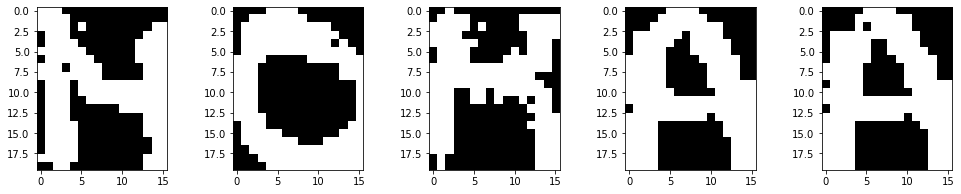

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

17


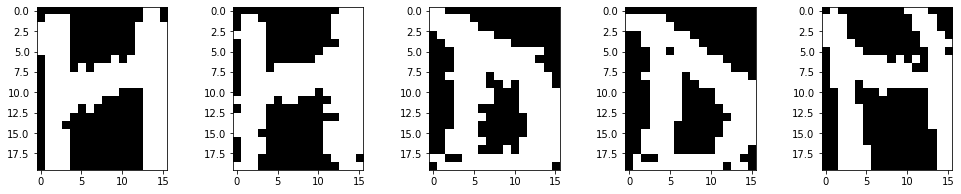

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

18


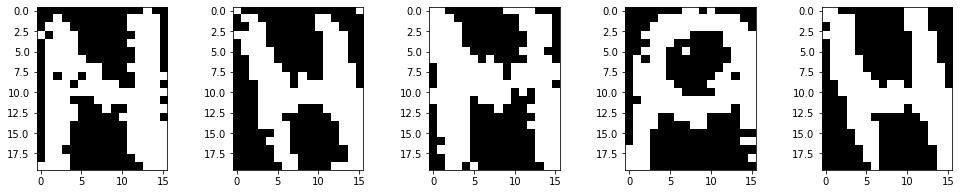

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

19


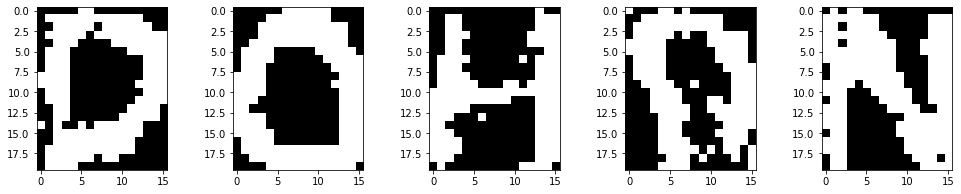

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

20


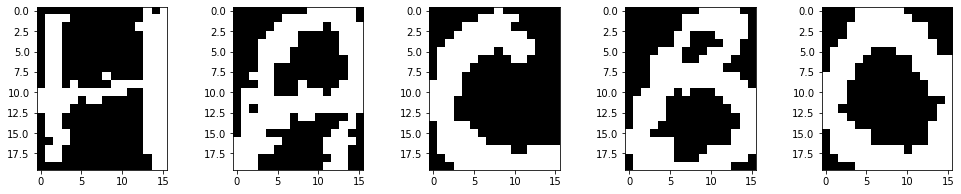

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

21


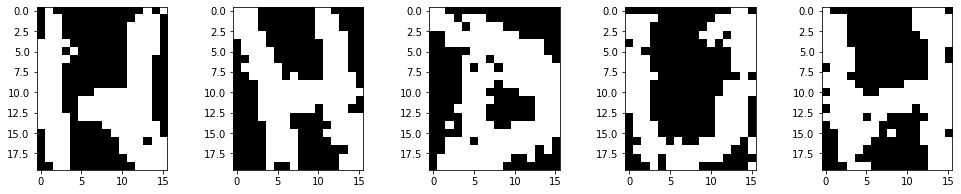

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

22


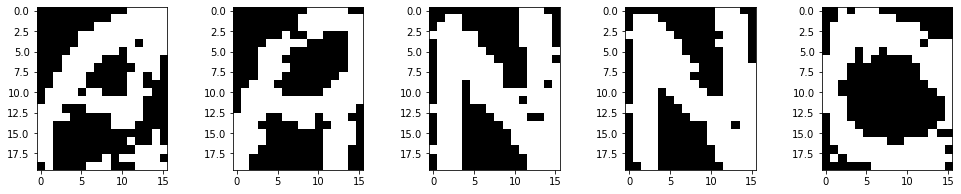

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

23


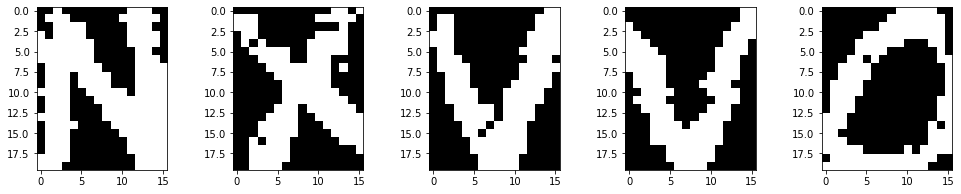

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

24


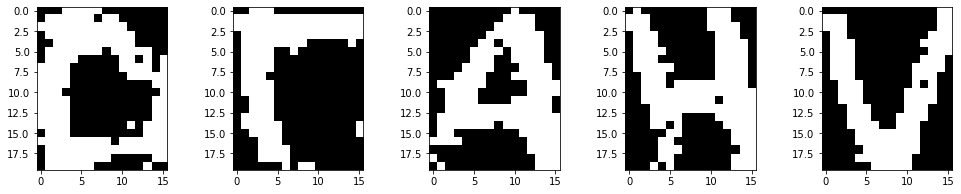

Pretraining layer 0/3:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

25


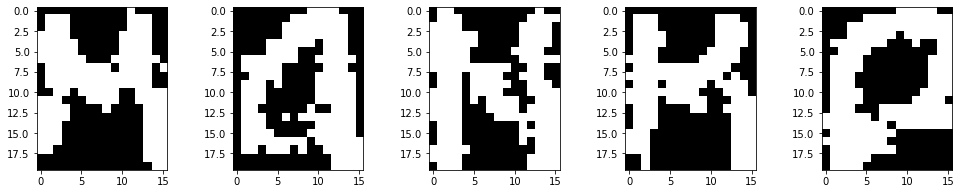

In [8]:
for letter in range(26):
    print(letter)
    reduced_dataset = alpha(up_to=letter)
    dnn = DNN(reduced_dataset.shape[1], [300, 200, 100], 10)
    errors = dnn.pretrain(reduced_dataset, 16, num_epochs=1000, lr=0.1, verbose=False)
    gen_and_plot(dnn, (20, 16))

## Digits Only

Layer pretrain epoch : 0:   0%|                                                               | 0/1000 [00:00<?, ?it/s]

0


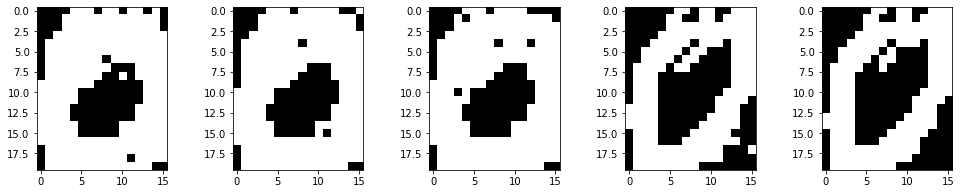

Layer pretrain epoch : 9:   1%|▎                                                      | 6/1000 [00:00<00:17, 56.26it/s]

1


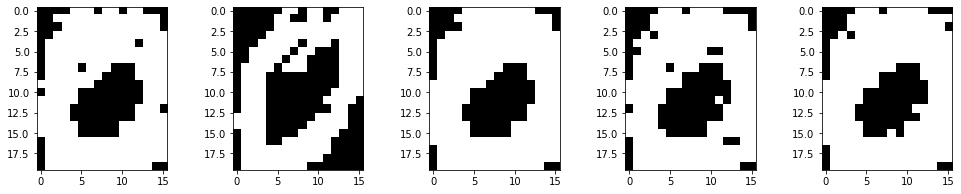

Layer pretrain epoch : 9:   1%|▎                                                      | 6/1000 [00:00<00:17, 57.30it/s]

2


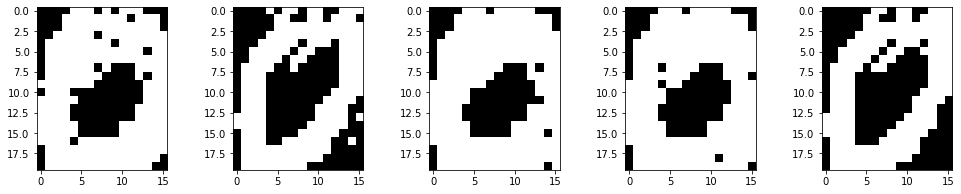

Layer pretrain epoch : 6:   0%|▎                                                      | 5/1000 [00:00<00:27, 36.22it/s]

3


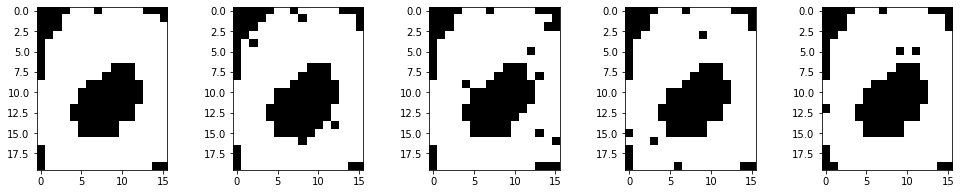

Layer pretrain epoch : 5:   0%|▏                                                      | 4/1000 [00:00<00:30, 33.15it/s]

4


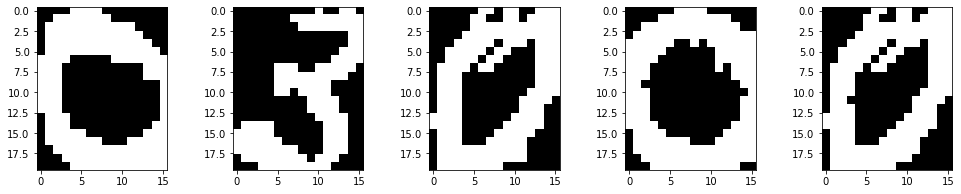

Layer pretrain epoch : 4:   0%|▏                                                      | 3/1000 [00:00<00:40, 24.66it/s]

5


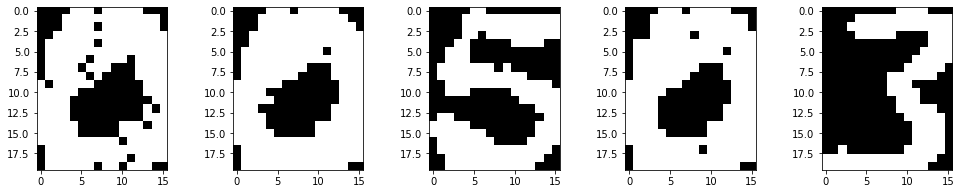

Layer pretrain epoch : 5:   0%|▏                                                      | 3/1000 [00:00<00:35, 28.38it/s]

6


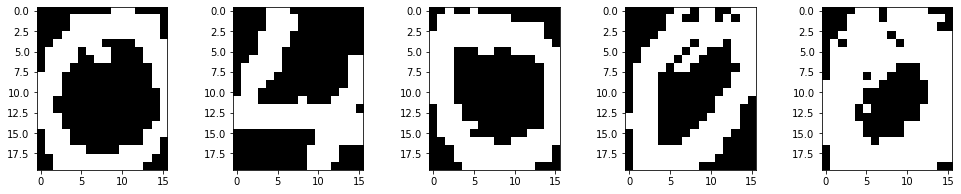

Layer pretrain epoch : 3:   0%|                                                       | 2/1000 [00:00<00:52, 19.10it/s]

7


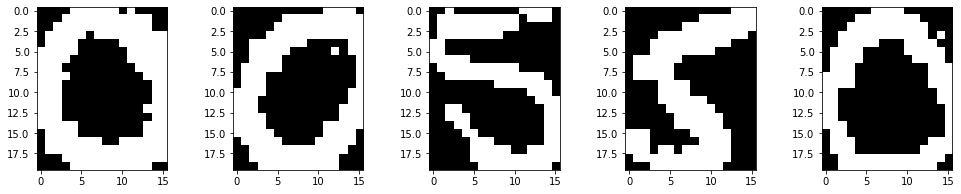

Layer pretrain epoch : 2:   0%|                                                       | 2/1000 [00:00<00:56, 17.55it/s]

8


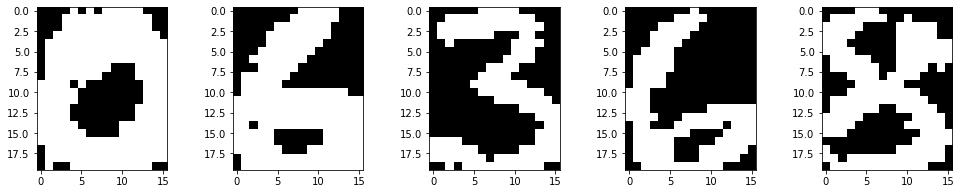

Layer pretrain epoch : 2:   0%|                                                       | 2/1000 [00:00<01:11, 13.93it/s]

9


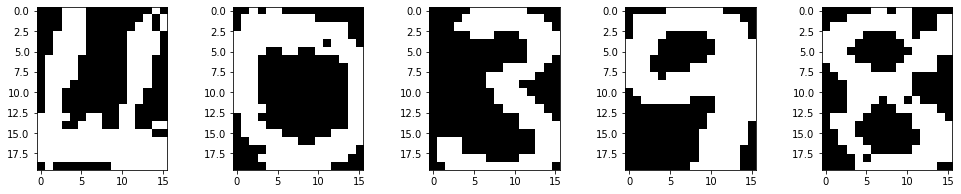

In [4]:
for number in range(10):
    print(number)
    reduced_dataset = alpha(up_to=number, letter=False)
    dnn = DNN(reduced_dataset.shape[1], [300, 200, 100], 10)
    errors = dnn.pretrain(reduced_dataset, 16, num_epochs=1000, lr=0.1, verbose=False)
    gen_and_plot(dnn, (20, 16))

# MNIST

In [7]:
from codes.utils import load_mnist

train = load_mnist()

img = train[0][0]
label = train[1][0]

img = [img[i].flatten().reshape(1,-1) for i in range(img.shape[0])]
img = np.concatenate(img)
img.shape

def mnist(number):
    numbers = train[0][0][train[1][0]<number+1]
    numbers = [numbers[i].flatten() for i in range(numbers.shape[0])]
    numbers = np.array(numbers)
    return numbers

Up to : 0


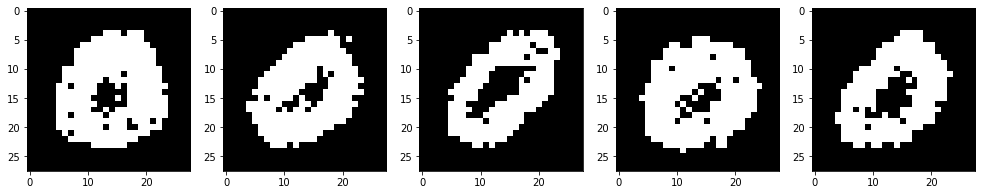

Up to : 1


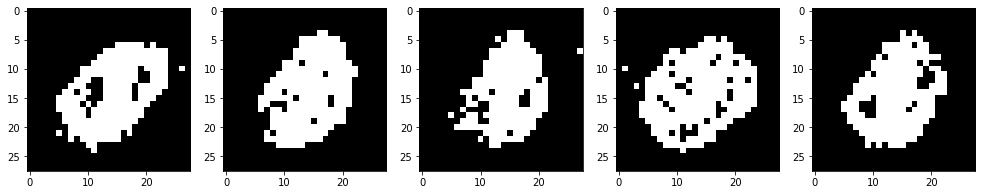

In [8]:
for number in range(2):
    print('Up to :',number)
    reduced_dataset = mnist(number)
    dnn = DNN(reduced_dataset.shape[1], [500, 200], 10)
    errors = dnn.pretrain(reduced_dataset, 128, num_epochs=100, lr=0.1, verbose=False)
    gen_and_plot(dnn, (28, 28))